In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
na_values = ['NaN','Na',' ','N/A']
df_listings = pd.read_csv('Data\cph_listings.csv',na_values=na_values)

In [3]:
pd.set_option('display.max_columns', None)
df_listings

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,772195193586734462,https://www.airbnb.com/rooms/772195193586734462,20231227173932,2024-01-03,previous scrape,Rental unit in Copenhagen · 1 bedroom · 1 bed ...,NaN,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,139504671,https://www.airbnb.com/users/show/139504671,Alexandra,2017-07-09,"Copenhagen, Denmark",NaN,within an hour,100%,57%,f,https://a0.muscache.com/im/pictures/user/32ecb...,https://a0.muscache.com/im/pictures/user/32ecb...,NaN,2.0,2.0,"['email', 'phone']",t,t,NaN,Indre By,NaN,55.685219,12.565863,Private room in rental unit,Private room,2,NaN,1 shared bath,NaN,1.0,[],NaN,5,12,5,5,12,12,5.0,12.0,NaN,NaN,0,0,0,0,2024-01-03,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,2,0,2,0,NaN
1,993508926988263521,https://www.airbnb.com/rooms/993508926988263521,20231227173932,2023-12-27,city scrape,Rental unit in Copenhagen · ★4.67 · 1 bedroom ...,NaN,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,540024469,https://www.airbnb.com/users/show/540024469,Marie,2023-10-02,NaN,NaN,within a few hours,100%,100%,f,https://a0.muscache.com/im/pictures/user/0c28f...,https://a0.muscache.com/im/pictures/user/0c28f...,NaN,1.0,1.0,"['email', 'phone']",t,f,NaN,Amager st,NaN,55.653641,12.613375,Entire rental unit,Entire home/apt,2,NaN,1 bath,NaN,1.0,[],$860.00,2,20,2,7,20,20,2.3,20.0,NaN,t,12,25,25,25,2023-12-27,9,9,3,2023-10-08,2023-12-22,4.67,4.67,4.67,4.78,4.78,4.67,4.67,NaN,f,1,1,0,0,3.33
2,973046361084511805,https://www.airbnb.com/rooms/973046361084511805,20231227173932,2023-12-28,city scrape,Rental unit in Copenhagen · ★4.86 · 1 bedroom ...,NaN,NaN,https://a0.muscache.com/pictures/hosting/Hosti...,413314931,https://www.airbnb.com/users/show/413314931,Julie,2021-07-16,"Copenhagen, Denmark",NaN,within a few hours,80%,57%,f,https://a0.muscache.com/im/pictures/user/57556...,https://a0.muscache.com/im/pictures/user/57556...,NaN,1.0,1.0,"['email', 'phone']",t,t,NaN,Amager Vest,NaN,55.666180,12.578590,Entire rental unit,Entire home/apt,3,NaN,1 bath,NaN,1.0,[],"$1,000.00",2,60,2,2,60,60,2.0,60.0,NaN,t,0,0,20,107,2023-12-28,7,7,3,2023-11-03,2023-12-17,4.86,4.86,4.43,4.71,4.71,5.00,4.43,NaN,f,1,1,0,0,3.75
3,52551491,https://www.airbnb.com/rooms/52551491,20231227173932,2023-12-28,city scrape,Condo in Copenhagen · ★5.0 · 1 bedroom · 1 bed...,NaN,Having won prices for its urban architecture a...,https://a0.muscache.com/pictures/ae4d3db9-9f91...,36416123,https://www.airbnb.com/users/show/36416123,Kasper,2015-06-22,"Copenhagen, Denmark",We are a friendly and outgoing Danish/Brazilia...,within a day,100%,48%,f,https://a0.muscache.com/im/pictures/user/3c864...,https://a0.muscache.com/im/pictures/user/3c864...,NaN,1.0,1.0,"['email', 'phone']",t,t

In [4]:
df_listings.shape

(18545, 75)

In [5]:
df_listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

# Checking data types

In [6]:
types_dict = df_listings.dtypes.to_dict()
for column, dtype in df_listings.dtypes.items():
    print(f"Column '{column}' has data type '{dtype}'.")

Column 'id' has data type 'int64'.
Column 'listing_url' has data type 'object'.
Column 'scrape_id' has data type 'int64'.
Column 'last_scraped' has data type 'object'.
Column 'source' has data type 'object'.
Column 'name' has data type 'object'.
Column 'description' has data type 'float64'.
Column 'neighborhood_overview' has data type 'object'.
Column 'picture_url' has data type 'object'.
Column 'host_id' has data type 'int64'.
Column 'host_url' has data type 'object'.
Column 'host_name' has data type 'object'.
Column 'host_since' has data type 'object'.
Column 'host_location' has data type 'object'.
Column 'host_about' has data type 'object'.
Column 'host_response_time' has data type 'object'.
Column 'host_response_rate' has data type 'object'.
Column 'host_acceptance_rate' has data type 'object'.
Column 'host_is_superhost' has data type 'object'.
Column 'host_thumbnail_url' has data type 'object'.
Column 'host_picture_url' has data type 'object'.
Column 'host_neighbourhood' has data 

# Converting data types

Converting price from string to numeric

In [7]:
df_listings['price'] = pd.to_numeric(df_listings['price'].str.replace('$', '').str.replace(',', ''))

Converting column available from nominal data type to numeric replaceing f with 0 and t with 1

In [8]:
df_listings['has_availability'] = df_listings['has_availability'].replace({'f': 0, 't': 1})

Converting license from string to numeric

In [9]:
df_listings['license'] = df_listings['license'].replace({'f': 0, 't': 1})

Converting instant bookable from string to numeric

In [10]:
df_listings['instant_bookable'] = df_listings['instant_bookable'].replace({'f': 0, 't': 1})

Converting host_identity_verified from string to numeric

In [11]:
df_listings['host_identity_verified'] = df_listings['host_identity_verified'].replace({'f': 0, 't': 1})

Making bathrooms equal to bathrooms_text rows and then converting bathrooms to numeric data type

In [12]:
df_listings['bathrooms_text'] = df_listings['bathrooms_text'].str.extract('(\d+\.?\d*)')

df_listings['bathrooms_text'] = pd.to_numeric(df_listings['bathrooms_text'])
df_listings['bathrooms_text'].head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: bathrooms_text, dtype: float64

In [13]:
df_listings['bathrooms'] = df_listings['bathrooms_text']

Converting host_response_rate to numeric from string.

In [14]:
df_listings['host_response_rate'] = df_listings['host_response_rate'].str.replace('%', '')

df_listings['host_response_rate'] = pd.to_numeric(df_listings['host_response_rate'])

Converting host_acceptance_rate to numeric from string.

In [15]:
df_listings['host_acceptance_rate'] = df_listings['host_acceptance_rate'].str.replace('%', '')

df_listings['host_acceptance_rate'] = pd.to_numeric(df_listings['host_acceptance_rate'])

# Finding all undefined values

In [16]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
df_listings.isnull().sum()

id                                                  0
listing_url                                         0
scrape_id                                           0
last_scraped                                        0
source                                              0
name                                                0
description                                     18545
neighborhood_overview                            9985
picture_url                                         0
host_id                                             0
host_url                                            0
host_name                                           1
host_since                                          1
host_location                                    2824
host_about                                      10404
host_response_time                               8328
host_response_rate                               8328
host_acceptance_rate                             3159
host_is_superhost           

# Removing redundant columns

In [17]:
df_listings.drop(columns=['last_review','first_review','has_availability','neighbourhood','bathrooms_text','bedrooms','neighbourhood_group_cleansed','license','calendar_updated','host_neighbourhood','description','neighborhood_overview','host_about'],inplace=True)

In [18]:
df_listings.head()

,id,listing_url,scrape_id,last_scraped,source,name,picture_url,host_id,host_url,host_name,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,772195193586734462,https://www.airbnb.com/rooms/772195193586734462,20231227173932,2024-01-03,previous scrape,Rental unit in Copenhagen · 1 bedroom · 1 bed ...,https://a0.muscache.com/pictures/miso/Hosting-...,139504671,https://www.airbnb.com/users/show/139504671,Alexandra,2017-07-09,"Copenhagen, Denmark",within an hour,100.0,57.0,f,https://a0.muscache.com/im/pictures/user/32ecb...,https://a0.muscache.com/im/pictures/user/32ecb...,2.0,2.0,"['email', 'phone']",t,1.0,Indre By,55.685219,12.565863,Private room in rental unit,Private room,2,1.0,1.0,[],NaN,5,12,5,5,12,12,5.0,12.0,0,0,0,0,2024-01-03,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2,0,2,0,NaN
1,993508926988263521,https://www.airbnb.com/rooms/993508926988263521,20231227173932,2023-12-27,city scrape,Rental unit in Copenhagen · ★4.67 · 1 bedroom ...,https://a0.muscache.com/pictures/miso/Hosting-...,540024469,https://www.airbnb.com/users/show/540024469,Marie,2023-10-02,NaN,within a few hours,100.0,100.0,f,https://a0.muscache.com/im/pictures/user/0c28f...,https://a0.muscache.com/im/pictures/user/0c28f...,1.0,1.0,"['email', 'phone']",t,0.0,Amager st,55.653641,12.613375,Entire rental unit,Entire home/apt,2,1.0,1.0,[],860.0,2,20,2,7,20,20,2.3,20.0,12,25,25,25,2023-12-27,9,9,3,2023-10-08,2023-12-22,4.67,4.67,4.67,4.78,4.78,4.67,4.67,0,1,1,0,0,3.33
2,973046361084511805,https://www.airbnb.com/rooms/973046361084511805,20231227173932,2023-12-28,city scrape,Rental unit in Copenhagen · ★4.86 · 1 bedroom ...,https://a0.muscache.com/pictures/hosting/Hosti...,413314931,https://www.airbnb.com/users/show/413314931,Julie,2021-07-16,"Copenhagen, Denmark",within a few hours,80.0,57.0,f,https://a0.muscache.com/im/pictures/user/57556...,https://a0.muscache.com/im/pictures/user/57556...,1.0,1.0,"['email', 'phone']",t,1.0,Amager Vest,55.666180,12.578590,Entire rental unit,Entire home/apt,3,1.0,1.0,[],1000.0,2,60,2,2,60,60,2.0,60.0,0,0,20,107,2023-12-28,7,7,3,2023-11-03,2023-12-17,4.86,4.86,4.43,4.71,4.71,5.00,4.43,0,1,1,0,0,3.75
3,52551491,https://www.airbnb.com/rooms/52551491,20231227173932,2023-12-28,city scrape,Condo in Copenhagen · ★5.0 · 1 bedroom · 1 bed...,https://a0.muscache.com/pictures/ae4d3db9-9f91...,36416123,https://www.airbnb.com/users/show/36416123,Kasper,2015-06-22,"Copenhagen, Denmark",within a day,100.0,48.0,f,https://a0.muscache.com/im/pictures/user/3c864...,https://a0.muscache.com/im/pictures/user/3c864...,1.0,1.0,"['email', 'phone']",t,1.0,Vesterbro-Kongens Enghave,55.667760,12.535530,Entire condo,Entire home/apt,2,1.0,1.0,[],1200.0,2,7,2,2,7,7,2.0,7.0,28,58,88,178,2023-12-28,16,9,0,2021-10-11,2023-08-24,5.00,4.94,5.00,4.94,5.00,4.88,4.94,0,1,1,0,0,0.59
4,723099448414722172,https://www.airbnb.com/rooms/723099448414722172,20231227173932,2023-12-28,city scrape,Condo in Copenhagen · ★4.94 · 2 bedrooms · 3 b...,https://a0.muscache.com/pictures/32c9850

In [19]:
df_listings.isnull().sum()

id                                                 0
listing_url                                        0
scrape_id                                          0
last_scraped                                       0
source                                             0
name                                               0
picture_url                                        0
host_id                                            0
host_url                                           0
host_name                                          1
host_since                                         1
host_location                                   2824
host_response_time                              8328
host_response_rate                              8328
host_acceptance_rate                            3159
host_is_superhost                                 32
host_thumbnail_url                                 1
host_picture_url                                   1
host_listings_count                           

# Dealing with undefined values

Filling undefined prices with mean

In [20]:
average_price = df_listings['price'].mean()

df_listings['price'].fillna(average_price, inplace=True)

Filling undefined bathrooms with mean

In [21]:
average_bathrooms = df_listings['bathrooms'].mean()

df_listings['bathrooms'].fillna(average_bathrooms, inplace=True)

Filling undefined review score columns

In [22]:
average_review_score_rating = df_listings['review_scores_rating'].mean()
mean_review_scores_accuracy = df_listings['review_scores_accuracy'].mean()
mean_review_scores_cleanliness = df_listings['review_scores_cleanliness'].mean()
mean_review_scores_checkin = df_listings['review_scores_checkin'].mean()
mean_review_scores_communication = df_listings['review_scores_communication'].mean()
mean_review_scores_location = df_listings['review_scores_location'].mean()
mean_review_scores_value = df_listings['review_scores_value'].mean()
mean_reviews_per_month = df_listings['reviews_per_month'].mean()

df_listings['reviews_per_month'].fillna(mean_reviews_per_month, inplace=True)
df_listings['review_scores_rating'].fillna(average_review_score_rating, inplace=True)
df_listings['review_scores_accuracy'].fillna(mean_review_scores_accuracy, inplace=True)
df_listings['review_scores_cleanliness'].fillna(mean_review_scores_cleanliness, inplace=True)
df_listings['review_scores_checkin'].fillna(mean_review_scores_checkin, inplace=True)
df_listings['review_scores_communication'].fillna(mean_review_scores_communication, inplace=True)
df_listings['review_scores_location'].fillna(mean_review_scores_location, inplace=True)
df_listings['review_scores_value'].fillna(mean_review_scores_value, inplace=True)


Host response rate

In [23]:
mean_host_respone_rate = df_listings['host_response_rate'].mean()
df_listings['host_response_rate'].fillna(mean_host_respone_rate, inplace=True)

Host acceptance rate

In [24]:
mean_host_acceptance_rate = df_listings['host_acceptance_rate'].mean()
df_listings['host_acceptance_rate'].fillna(mean_host_acceptance_rate, inplace=True)

Taking average amount of beds and filling undefined values.

In [25]:
mean_beds = df_listings['beds'].mean()
df_listings['beds'].fillna(mean_beds,inplace=True)

Checking how many undefined values are left.

In [26]:
df_listings.isnull().sum()

id                                                 0
listing_url                                        0
scrape_id                                          0
last_scraped                                       0
source                                             0
name                                               0
picture_url                                        0
host_id                                            0
host_url                                           0
host_name                                          1
host_since                                         1
host_location                                   2824
host_response_time                              8328
host_response_rate                                 0
host_acceptance_rate                               0
host_is_superhost                                 32
host_thumbnail_url                                 1
host_picture_url                                   1
host_listings_count                           

# Checking correlations between values

In [27]:
numeric_df = df_listings.select_dtypes(include=['number'])

correlation_matrix = numeric_df.corr()

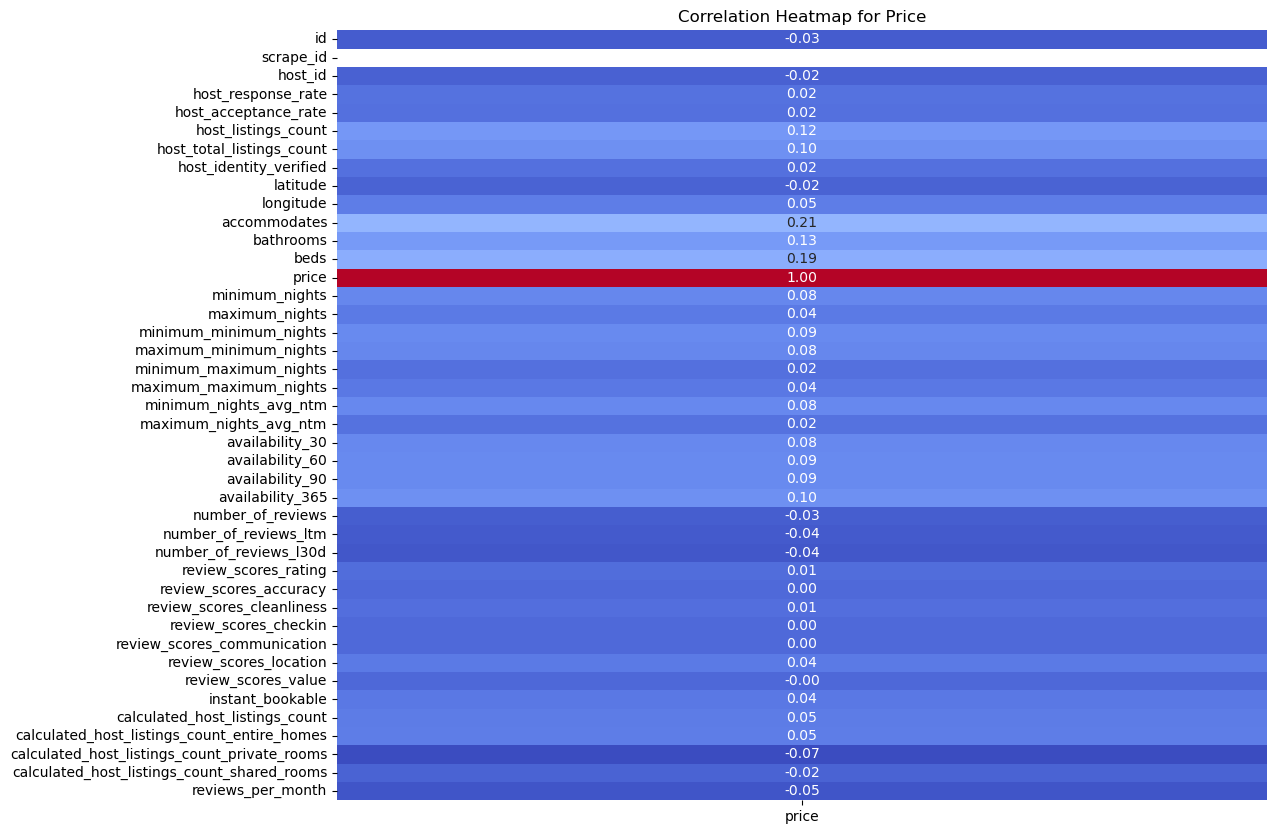

In [28]:
price_correlation = correlation_matrix['price']

plt.figure(figsize=(12, 10))
sns.heatmap(price_correlation.to_frame(), cmap='coolwarm', annot=True, fmt=".2f", cbar=False)
plt.title('Correlation Heatmap for Price')
plt.show()

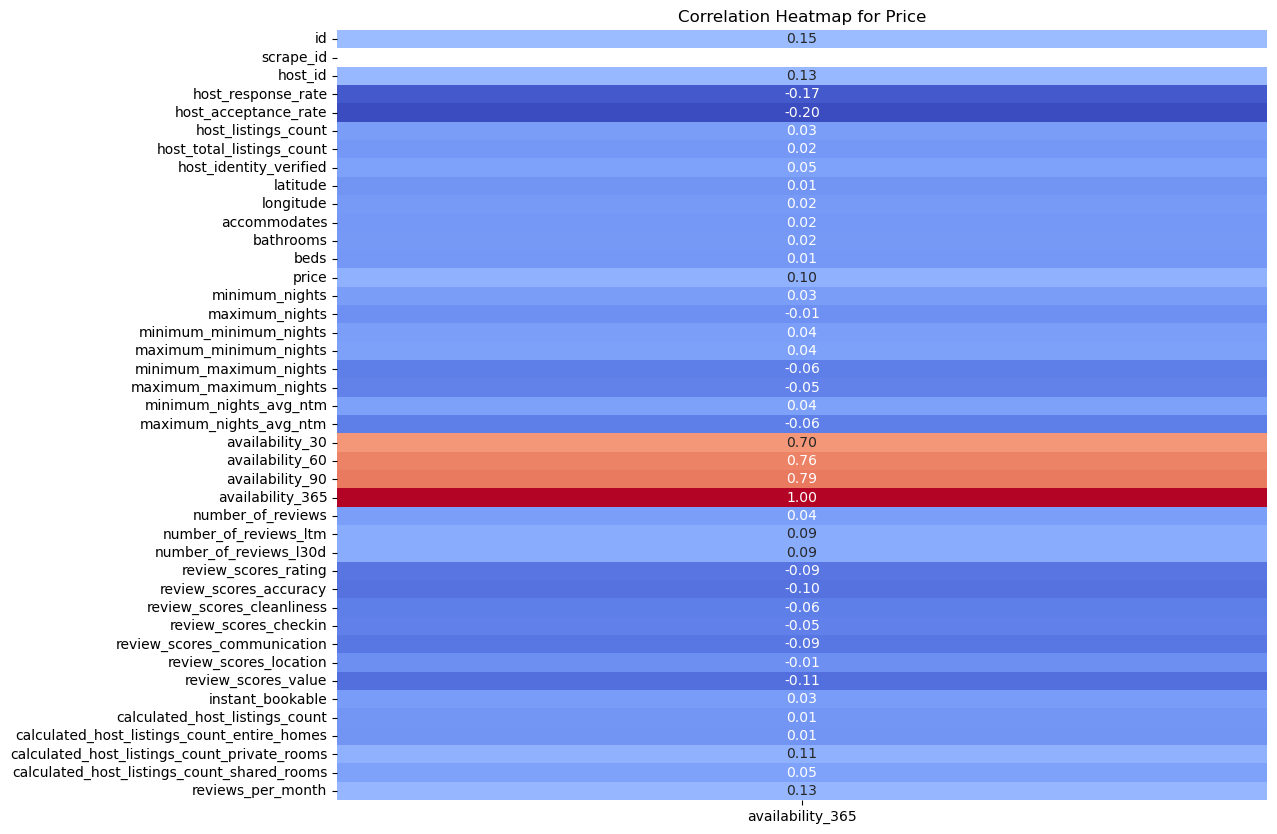

In [29]:
availability_correlation = correlation_matrix['availability_365']

plt.figure(figsize=(12, 10))
sns.heatmap(availability_correlation.to_frame(), cmap='coolwarm', annot=True, fmt=".2f", cbar=False)
plt.title('Correlation Heatmap for Price')
plt.show()

# Doing descriptive statistics

In [30]:
numeric_df.describe()

,id,scrape_id,host_id,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,host_identity_verified,latitude,longitude,accommodates,bathrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,1.854500e+04,1.854500e+04,1.854500e+04,18545.000000,18545.000000,18544.000000,18544.000000,18544.000000,18545.000000,18545.000000,18545.000000,18545.000000,18545.000000,18545.000000,18545.000000,18545.000000,18545.000000,18545.000000,18545.000000,18545.000000,18545.000000,18545.000000,18545.000000,18545.000000,18545.000000,18545.000000,18545.000000,18545.000000,18545.000000,18545.000000,18545.000000,18545.000000,18545.000000,18545.000000,18545.000000,18545.000000,18545.000000,18545.000000,18545.000000,18545.000000,18545.000000,18545.000000
mean,4.046612e+17,2.023123e+13,1.306585e+08,90.028678,71.502730,5.643658,11.733175,0.890585,55.680347,12.558489,3.326126,1.102091,1.907986,1314.366760,4.555244,400.268051,4.301968,4.971529,485.528714,493.379617,4.653330,487.686789,6.895551,15.552925,24.510057,85.512321,17.903208,5.330493,0.251011,4.818393,4.839057,4.694532,4.872860,4.910766,4.834828,4.711502,0.117067,3.598544,3.397196,0.194823,0.004907,0.733334
std,4.220116e+17,1.179719e+00,1.560731e+08,18.329092,28.465931,35.369401,81.607273,0.312168,0.019162,0.031342,1.650973,0.296966,1.252743,1233.302254,18.812196,451.383226,17.511643,18.624052,482.953391,483.915412,18.048801,482.140512,10.517111,22.109769,33.976144,120.686934,40.394133,12.243022,0.909830,0.266345,0.252752,0.365325,0.240045,0.205441,0.224622,0.302180,0.321508,19.060369,19.069972,0.882589,0.106049,0.934612
min,2.605700e+04,2.023123e+13,5.130000e+02,0.000000,0.000000,1.000000,1.000000,0.000000,55.615890,12.454000,1.000000,0.000000,1.000000,125.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,2.639056e+07,2.023123e+13,1.634132e+07,90.028678,59.000000,1.000000,1.000000,1.000000,55.666249,12.540837,2.000000,1.000000,1.000000,957.000000,2.000000,20.000000,2.000000,2.000000,21.000000,22.000000,2.000000,22.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,4.780000,4.800000,4.610000,4.860000,4.910766,4.790000,4.640000,0.000000,1.000000,1.000000,0.000000,0.000000,0.230000
50%,5.393807e+07,2.023123e+13,5.799822e+07,90.028678,71.502730,1.000000,1.000000,1.000000,55.681420,12.555170,3.000000,1.000000,1.000000,1314.366760,3.000000,365.000000,3.000000,3.000000,365.000000,365.000000,3.000000,365.000000,0.000000,0.000000,1.000000,13.000000,7.000000,2.000000,0.000000,4.860000,4.890000,4.750000,4.930000,5.000000,4.880000,4.730000,0.000000,1.000000,1.000000,0.000000,0.000000,0.520000
75%,8.492742e+17,2.023123e+13,1.876103e+08,100.000000,100.000000,1.000000,2.000000,1.000000,55.695610,12.580360,4.000000,1.000000,2.000000,1314.366760,4.000000,1125.000000,4.000000,4.000000,1125.000000,1125.000000,4.000000,1125.000000,13.000000,30.000000,54.000000,145.000000,18.000000,6.000000,0.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.900000,0.000000,1.000000,1.000000,0.000000,0.000000,0.790000
max,1.054958e+18,2.023123e+13,5.525667e+08,100.000000,100.000000,814.000000,1836.000000,1.000000,55.732470,12.639720,16.000000,5.000000,

Looking at bathrooms

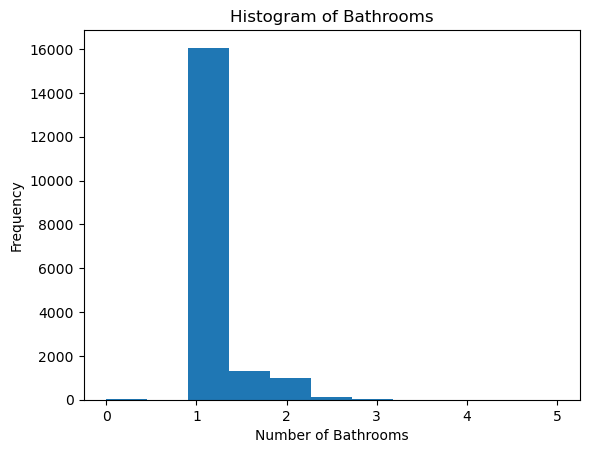

In [31]:
bathroom_counts = df_listings['bathrooms'].value_counts()

plt.hist(df_listings['bathrooms'], bins=len(bathroom_counts))
plt.xlabel('Number of Bathrooms')
plt.ylabel('Frequency')
plt.title('Histogram of Bathrooms')
plt.show()

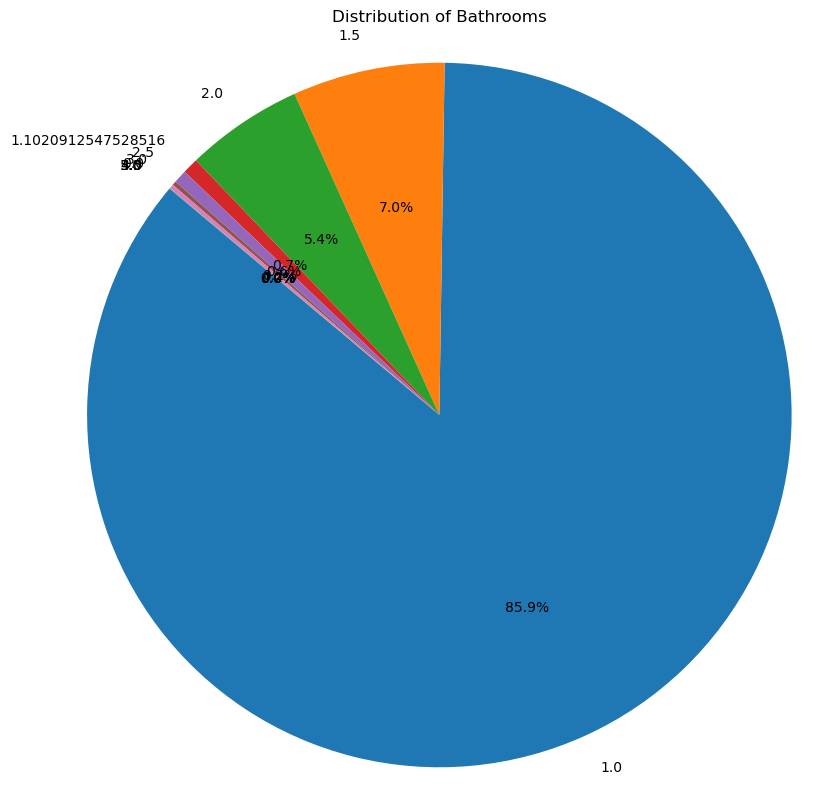

In [32]:
plt.figure(figsize=(10, 10))
plt.pie(bathroom_counts, labels=bathroom_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Bathrooms')
plt.axis('equal') 
plt.show()